In [40]:
#Import  the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
import re
import time 
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [41]:
pip install Datetimeindex

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Datetimeindex (from versions: none)
ERROR: No matching distribution found for Datetimeindex


In [42]:
historical_data = pd.read_csv('historical_data.csv').iloc[:, 1:]

In [43]:
# Show Data
historical_data.head()

,date,open,high,low,close,volume,market_cap
0,2021-06-02,"$2,634.46","$2,801.39","$2,555.40","$2,706.12","$27,723,267,359","$314,266,256,163"
1,2021-06-01,"$2,707.56","$2,739.74","$2,531.16","$2,633.52","$27,363,223,090","$305,798,597,367"
2,2021-05-31,"$2,387.20","$2,715.86","$2,279.51","$2,714.95","$31,007,383,150","$315,217,277,483"
3,2021-05-30,"$2,278.29","$2,472.19","$2,188.83","$2,390.31","$25,876,619,428","$277,492,990,927"
4,2021-05-29,"$2,414.07","$2,566.94","$2,208.49","$2,279.51","$33,773,720,220","$264,600,384,052"


In [44]:
df_ascending = historical_data.sort_values(by='date', ascending=True).reset_index(drop=True)
df_ascending

,date,open,high,low,close,volume,market_cap
0,2020-06-05,$244.35,$247.33,$240.68,$241.22,"$9,293,963,914","$26,830,954,614"
1,2020-06-06,$241.20,$245.98,$239.72,$241.93,"$8,114,873,845","$26,913,140,925"
2,2020-06-07,$241.91,$245.44,$236.33,$245.17,"$9,544,883,157","$27,276,459,502"
3,2020-06-08,$245.18,$246.64,$241.54,$246.31,"$8,076,783,299","$27,406,923,226"
4,2020-06-09,$246.18,$248.34,$242.34,$244.91,"$8,446,545,788","$27,254,678,255"
...,...,...,...,...,...,...,...
358,2021-05-29,"$2,414.07","$2,566.94","$2,208.49","$2,279.51","$33,773,720,220","$264,600,384,052"
359,2021-05-30,"$2,278.29","$2,472.19","$2,188.83","$2,390.31","$25,876,619,428","$277,492,990,927"
360,2021-05-31,"$2,387.20","$2,715.86","$2,279.51","$2,714.95","$31,007,383,150","$315,217,277,483"
361,2021-06-01,"$2,707.56","$2,739.74","$2,531.16","$2,633.52","$27,363,223,090","$305,798,597,367"


In [45]:
# Need to remove all the $ from the dataframe
df_clean_as = df_ascending.replace({'\$':''}, regex = True).replace({'\,':''}, regex = True)
df_clean_as

,date,open,high,low,close,volume,market_cap
0,2020-06-05,244.35,247.33,240.68,241.22,9293963914,26830954614
1,2020-06-06,241.20,245.98,239.72,241.93,8114873845,26913140925
2,2020-06-07,241.91,245.44,236.33,245.17,9544883157,27276459502
3,2020-06-08,245.18,246.64,241.54,246.31,8076783299,27406923226
4,2020-06-09,246.18,248.34,242.34,244.91,8446545788,27254678255
...,...,...,...,...,...,...,...
358,2021-05-29,2414.07,2566.94,2208.49,2279.51,33773720220,264600384052
359,2021-05-30,2278.29,2472.19,2188.83,2390.31,25876619428,277492990927
360,2021-05-31,2387.20,2715.86,2279.51,2714.95,31007383150,315217277483
361,2021-06-01,2707.56,2739.74,2531.16,2633.52,27363223090,305798597367


In [46]:
df_clean_as.open = pd.to_numeric(df_clean_as.open)
df_clean_as.high = pd.to_numeric(df_clean_as.high)
df_clean_as.low = pd.to_numeric(df_clean_as.low)
df_clean_as.close = pd.to_numeric(df_clean_as.close)
df_clean_as.volume = pd.to_numeric(df_clean_as.volume)
df_clean_as.market_cap = pd.to_numeric(df_clean_as.market_cap)
df_clean_as.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        363 non-null    object 
 1   open        363 non-null    float64
 2   high        363 non-null    float64
 3   low         363 non-null    float64
 4   close       363 non-null    float64
 5   volume      363 non-null    int64  
 6   market_cap  363 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.0+ KB


In [47]:
# Set the date as the index
df_clean_as = df_clean_as.set_index(pd.to_datetime(df_clean_as['date']))
#Show the date
df_clean_as

,date,open,high,low,close,volume,market_cap
date,,,,,,,
2020-06-05,2020-06-05,244.35,247.33,240.68,241.22,9293963914,26830954614
2020-06-06,2020-06-06,241.20,245.98,239.72,241.93,8114873845,26913140925
2020-06-07,2020-06-07,241.91,245.44,236.33,245.17,9544883157,27276459502
2020-06-08,2020-06-08,245.18,246.64,241.54,246.31,8076783299,27406923226
2020-06-09,2020-06-09,246.18,248.34,242.34,244.91,8446545788,27254678255
...,...,...,...,...,...,...,...
2021-05-29,2021-05-29,2414.07,2566.94,2208.49,2279.51,33773720220,264600384052
2021-05-30,2021-05-30,2278.29,2472.19,2188.83,2390.31,25876619428,277492990927
2021-05-31,2021-05-31,2387.20,2715.86,2279.51,2714.95,31007383150,315217277483


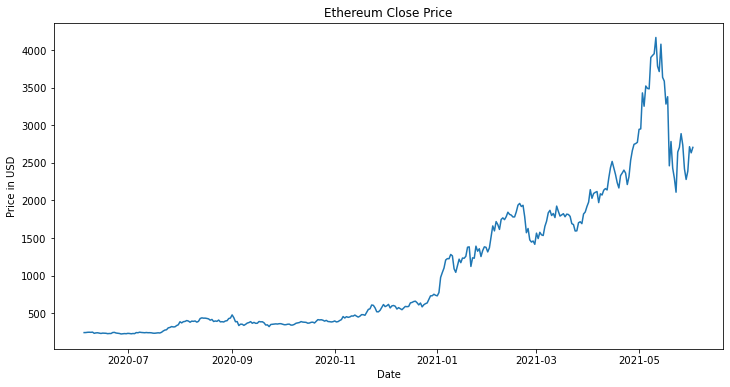

In [48]:
# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(df_clean_as.index, df_clean_as['close'], label='Close')
plt.title('Ethereum Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [49]:
# Calculate the relative strength index
delta = df_clean_as['close'].diff(1)
# Must drop the a Nan created by differencing 
delta = delta.dropna()
# Create an up and down
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0

time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())

RS = AVG_Gain / AVG_Loss
RSI = 100 - (100/(1 + RS))

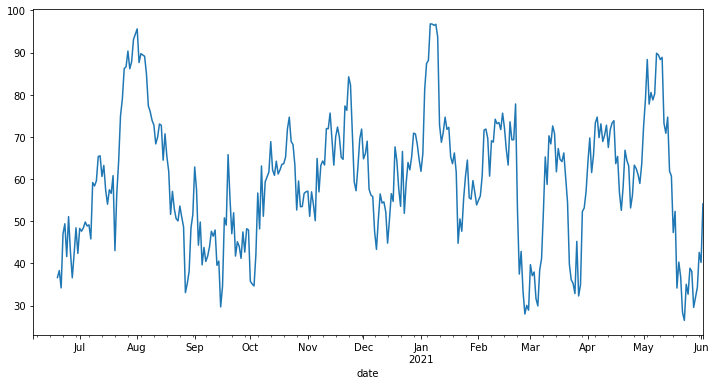

In [50]:
# Plot the graph
plt.figure(figsize=(12, 6))
RSI.plot()
plt.show()

In [51]:
#New Feature on df
df_clean_as['RSI'] = RSI
df_clean_as['delta'] = delta
#Show data
df_clean_as.head()

,date,open,high,low,close,volume,market_cap,RSI,delta
date,,,,,,,,,
2020-06-05,2020-06-05,244.35,247.33,240.68,241.22,9293963914,26830954614,NaN,NaN
2020-06-06,2020-06-06,241.20,245.98,239.72,241.93,8114873845,26913140925,NaN,0.71
2020-06-07,2020-06-07,241.91,245.44,236.33,245.17,9544883157,27276459502,NaN,3.24
2020-06-08,2020-06-08,245.18,246.64,241.54,246.31,8076783299,27406923226,NaN,1.14
2020-06-09,2020-06-09,246.18,248.34,242.34,244.91,8446545788,27254678255,NaN,-1.40


In [52]:
#Drop first row
df_clean_as.drop(df_clean_as.index[0], inplace=True)
df_clean_as.head()

,date,open,high,low,close,volume,market_cap,RSI,delta
date,,,,,,,,,
2020-06-06,2020-06-06,241.20,245.98,239.72,241.93,8114873845,26913140925,NaN,0.71
2020-06-07,2020-06-07,241.91,245.44,236.33,245.17,9544883157,27276459502,NaN,3.24
2020-06-08,2020-06-08,245.18,246.64,241.54,246.31,8076783299,27406923226,NaN,1.14
2020-06-09,2020-06-09,246.18,248.34,242.34,244.91,8446545788,27254678255,NaN,-1.40
2020-06-10,2020-06-10,244.82,248.65,242.82,247.44,8792990206,27539945413,NaN,2.53


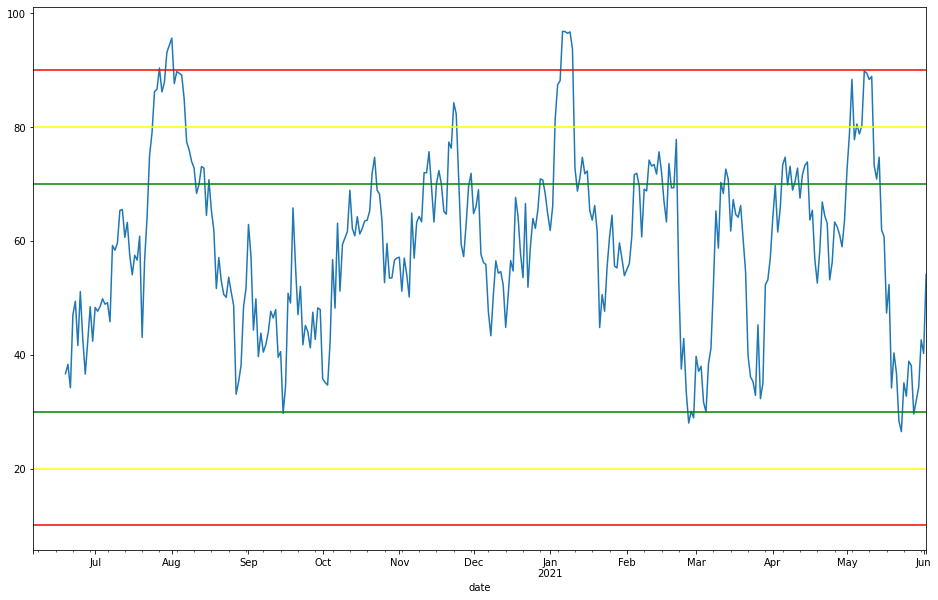

In [53]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
ax0 = RSI.plot(ax=ax)
ax0.axhline(30, color='green')
ax0.axhline(70, color='green')
ax0.axhline(20, color='yellow')
ax0.axhline(80, color='yellow')
ax0.axhline(10, color='red')
ax0.axhline(90, color='red')

In [54]:
df_clean_as['sell_points'] = np.where((RSI > 70) & (RSI.shift(1) <= 70), 1, 0)
df_clean_as['buy_points'] = np.where((RSI < 30) & (RSI.shift(1) >= 30), 1, 0)

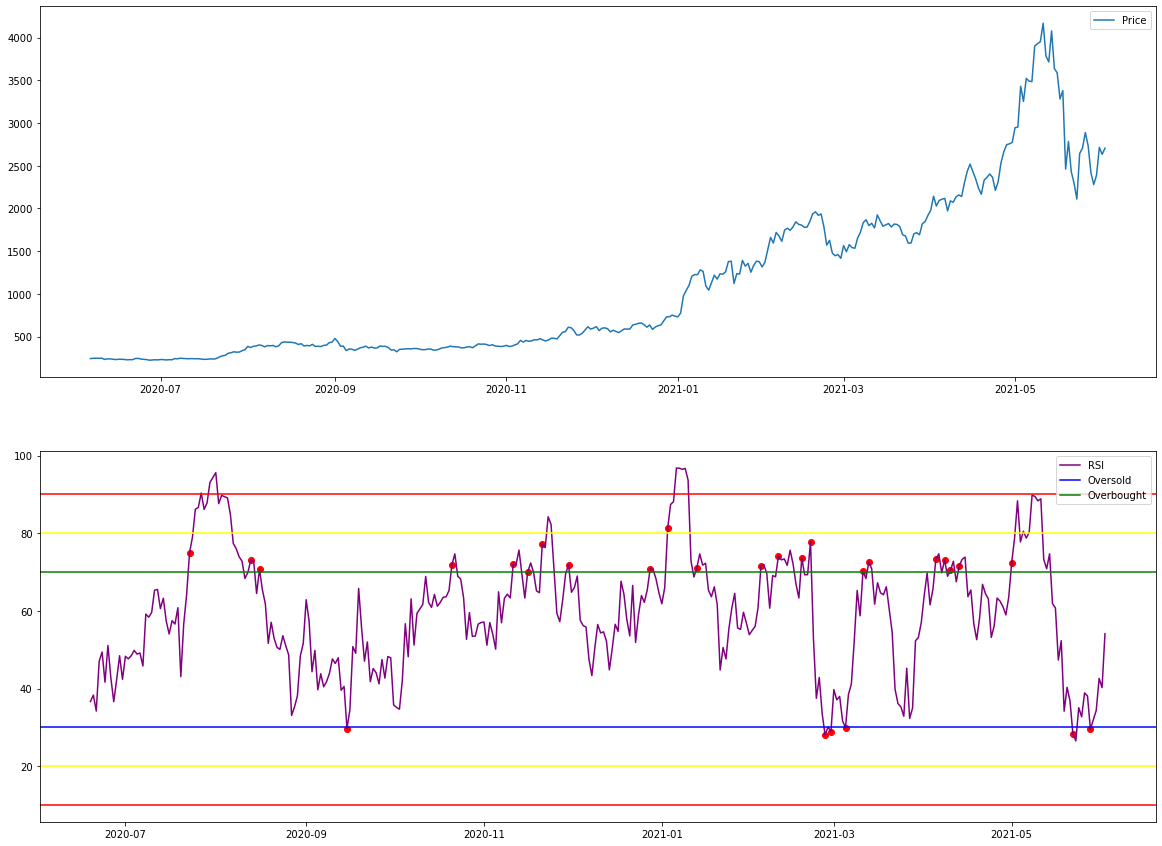

In [55]:
fig, ax = plt.subplots(2,1, figsize=(20,15))
ax[0].plot(df_clean_as['close'], label='Price')
ax[0].legend()

ax[1].plot(RSI, label='RSI', c='purple')
ax[1].axhline(30, color='blue', label='Oversold')
ax[1].axhline(70, color='green', label='Overbought')
ax[1].axhline(20, color='yellow')
ax[1].axhline(80, color='yellow')
ax[1].axhline(10, color='red')
ax[1].axhline(90, color='red')
ax[1].legend()

ax[1].scatter(df_clean_as[df_clean_as['sell_points'] == 1][-25:].index,
              df_clean_as[df_clean_as['sell_points'] == 1]['RSI'][-25:],
              c = 'red')

ax[1].scatter(df_clean_as[df_clean_as['buy_points'] == 1][-10:].index,
              df_clean_as[df_clean_as['buy_points'] == 1]['RSI'][-10:],
              c = 'red')

plt.savefig('Price_RSI')

In [56]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, start_cell="bottom-left",row_heights=[5,5], column_widths=[2])

fig.add_trace(go.Scatter(x=df_clean_as['date'], y= df_clean_as['close'], mode='lines', name='Ethereum Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df_clean_as['date'], y=df_clean_as['RSI'], mode='lines', name='RSI'), row=2, col=1)

fig.add_trace(go.Scatter(x=df_clean_as[df_clean_as['sell_points'] == 1][-25:].index,
                         y=df_clean_as[df_clean_as['sell_points'] == 1]['RSI'][-25:],
                         mode='markers', name='Overbought'),
             row=2, col=1)
fig.add_trace(go.Scatter(x=df_clean_as[df_clean_as['buy_points'] == 1][-10:].index,
                         y=df_clean_as[df_clean_as['buy_points'] == 1]['RSI'][-10:],
                         mode='markers', name='Oversold'),
             row=2, col=1)


In [18]:
df_clean_as['pct_change'] = df_clean_as['close'].pct_change()

# New feature to look at RSI: RSI_Delta
df_clean_as['RSI_Delta'] = df_clean_as['RSI'].diff(1)

# RSI_pct_change
df_clean_as['RSI_pct_change'] = df_clean_as['RSI'].pct_change()

df_clean_as

,date,open,high,low,close,volume,market_cap,RSI,delta,sell_points,buy_points,pct_change,RSI_Delta,RSI_pct_change
date,,,,,,,,,,,,,,
2020-06-06,2020-06-06,241.20,245.98,239.72,241.93,8114873845,26913140925,NaN,0.71,0,0,NaN,NaN,NaN
2020-06-07,2020-06-07,241.91,245.44,236.33,245.17,9544883157,27276459502,NaN,3.24,0,0,0.013392,NaN,NaN
2020-06-08,2020-06-08,245.18,246.64,241.54,246.31,8076783299,27406923226,NaN,1.14,0,0,0.004650,NaN,NaN
2020-06-09,2020-06-09,246.18,248.34,242.34,244.91,8446545788,27254678255,NaN,-1.40,0,0,-0.005684,NaN,NaN
2020-06-10,2020-06-10,244.82,248.65,242.82,247.44,8792990206,27539945413,NaN,2.53,0,0,0.010330,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-29,2021-05-29,2414.07,2566.94,2208.49,2279.51,33773720220,264600384052,31.930542,-140.40,0,0,-0.058019,2.363676,0.079943
2021-05-30,2021-05-30,2278.29,2472.19,2188.83,2390.31,25876619428,277492990927,34.328202,110.80,0,0,0.048607,2.397660,0.075090
2021-05-31,2021-05-31,2387.20,2715.86,2279.51,2714.95,31007383150,315217277483,42.609654,324.64,0,0,0.135815,8.281452,0.241243


In [19]:
df_clean_as['index'] = list(range(0,len(df_clean_as)))
df_clean_as.set_index('index', inplace=True)
df_clean_as.head()

,date,open,high,low,close,volume,market_cap,RSI,delta,sell_points,buy_points,pct_change,RSI_Delta,RSI_pct_change
index,,,,,,,,,,,,,,
0,2020-06-06,241.20,245.98,239.72,241.93,8114873845,26913140925,NaN,0.71,0,0,NaN,NaN,NaN
1,2020-06-07,241.91,245.44,236.33,245.17,9544883157,27276459502,NaN,3.24,0,0,0.013392,NaN,NaN
2,2020-06-08,245.18,246.64,241.54,246.31,8076783299,27406923226,NaN,1.14,0,0,0.004650,NaN,NaN
3,2020-06-09,246.18,248.34,242.34,244.91,8446545788,27254678255,NaN,-1.40,0,0,-0.005684,NaN,NaN
4,2020-06-10,244.82,248.65,242.82,247.44,8792990206,27539945413,NaN,2.53,0,0,0.010330,NaN,NaN


In [20]:
# Create new column
df_clean_as['bought_sold'] = 'bought_sold'

# Create a class for Overbought and underbought
for i in range(0, len(df_clean_as)):
    if df_clean_as['RSI'][i] >= 70:
        df_clean_as['bought_sold'][i] = 2 # Overbought
    elif df_clean_as['RSI'][i] <= 30:
        df_clean_as['bought_sold'][i] = 1 # Oversold
    else:
        df_clean_as['bought_sold'][i] = 0
df_clean_as.head(25)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,date,open,high,low,close,volume,market_cap,RSI,delta,sell_points,buy_points,pct_change,RSI_Delta,RSI_pct_change,bought_sold
index,,,,,,,,,,,,,,,
0,2020-06-06,241.20,245.98,239.72,241.93,8114873845,26913140925,NaN,0.71,0,0,NaN,NaN,NaN,0
1,2020-06-07,241.91,245.44,236.33,245.17,9544883157,27276459502,NaN,3.24,0,0,0.013392,NaN,NaN,0
2,2020-06-08,245.18,246.64,241.54,246.31,8076783299,27406923226,NaN,1.14,0,0,0.004650,NaN,NaN,0
3,2020-06-09,246.18,248.34,242.34,244.91,8446545788,27254678255,NaN,-1.40,0,0,-0.005684,NaN,NaN,0
4,2020-06-10,244.82,248.65,242.82,247.44,8792990206,27539945413,NaN,2.53,0,0,0.010330,NaN,NaN,0
5,2020-06-11,247.55,249.89,229.94,231.70,12356528860,25791024831,NaN,-15.74,0,0,-0.063611,NaN,NaN,0
6,2020-06-12,231.63,239.35,229.65,237.49,8868955009,26438827420,NaN,5.79,0,0,0.024989,NaN,NaN,0
7,2020-06-13,237.54,239.19,235.89,238.91,7141624980,26599679550,NaN,1.42,0,0,0.005979,NaN,NaN,0
8,2020-06-14,238.97,239.10,232.96,234.11,7439385176,26069111857,NaN,-4.80,0,0,-0.020091,NaN,NaN,0


In [21]:
# drop all Nan
df_clean_as = df_clean_as.dropna()
df_clean_as.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 14 to 361
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            348 non-null    object 
 1   open            348 non-null    float64
 2   high            348 non-null    float64
 3   low             348 non-null    float64
 4   close           348 non-null    float64
 5   volume          348 non-null    int64  
 6   market_cap      348 non-null    int64  
 7   RSI             348 non-null    float64
 8   delta           348 non-null    float64
 9   sell_points     348 non-null    int32  
 10  buy_points      348 non-null    int32  
 11  pct_change      348 non-null    float64
 12  RSI_Delta       348 non-null    float64
 13  RSI_pct_change  348 non-null    float64
 14  bought_sold     348 non-null    object 
dtypes: float64(9), int32(2), int64(2), object(2)
memory usage: 40.8+ KB


In [22]:
df_clean_as = df_clean_as.sort_values(by='date', ascending=False).reset_index(drop=True)

In [23]:
#Create columns for the previous values of one day out from the closed date
df_clean_as['open_class']= 0
df_clean_as['high_class'] = 0
df_clean_as['low_class'] = 0
df_clean_as['close_class'] = 0
df_clean_as['volume_class'] = 0

def label_class(column):
    #Create the class column with the title open_class
    for i in range(0,(len(df_clean_as)-1)):
        if df_clean_as[column][i] > df_clean_as[column][i+1]:
            df_clean_as[f'{column}_class'][i] = 1 # The market closed higher than the day before
        elif df_clean_as[column][i] < df_clean_as[column][i+1]:
            df_clean_as[f'{column}_class'][i] = 0 # The market closed lower than the day before
        else:
            df_clean_as[f'{column}_class'][i] = 2 # market stay the same
            
label_class('open')
label_class('high')
label_class('low')
label_class('close')
label_class('volume')
df_clean_as

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,date,open,high,low,close,volume,market_cap,RSI,delta,sell_points,buy_points,pct_change,RSI_Delta,RSI_pct_change,bought_sold,open_class,high_class,low_class,close_class,volume_class
0,2021-06-02,2634.46,2801.39,2555.40,2706.12,27723267359,314266256163,54.123517,72.60,0,0,0.027568,13.887727,0.345159,0,0,1,1,1,1
1,2021-06-01,2707.56,2739.74,2531.16,2633.52,27363223090,305798597367,40.235790,-81.43,0,0,-0.029993,-2.373864,-0.055712,0,1,1,1,0,0
2,2021-05-31,2387.20,2715.86,2279.51,2714.95,31007383150,315217277483,42.609654,324.64,0,0,0.135815,8.281452,0.241243,0,1,1,1,1,1
3,2021-05-30,2278.29,2472.19,2188.83,2390.31,25876619428,277492990927,34.328202,110.80,0,0,0.048607,2.397660,0.075090,0,0,0,0,1,0
4,2021-05-29,2414.07,2566.94,2208.49,2279.51,33773720220,264600384052,31.930542,-140.40,0,0,-0.058019,2.363676,0.079943,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-06-24,244.19,248.51,232.81,235.77,8815030025,26285822239,41.619991,-8.37,0,0,-0.034284,-7.776466,-0.157430,0,1,1,0,0,1
344,2020-06-23,242.54,244.86,239.76,244.14,6624530348,27215606543,49.396457,1.61,0,0,0.006638,2.369090,0.050377,0,1,1,1,1,0
345,2020-06-22,229.00,243.78,228.93,242.53,9079586552,27032930743,47.027367,13.54,0,0,0.059129,12.834323,0.375349,0,0,1,1,1,1
346,2020-06-21,229.22,232.36,228.49,228.99,5600408178,25520273837,34.193044,-0.28,0,0,-0.001221,-4.115046,-0.107420,0,1,1,1,0,0


In [25]:
#Create columns for the previous values of one day out from the closed date
df_clean_as['open_prev'] = [df_clean_as['open'][i+1] for i in range(0,len(df_clean_as)-1)] + [0]
df_clean_as['high_prev'] = [df_clean_as['high'][i+1] for i in range(0,len(df_clean_as)-1)] + [0]
df_clean_as['low_prev'] = [df_clean_as['low'][i+1] for i in range(0,len(df_clean_as)-1)] + [0]
df_clean_as['volume_prev'] = [df_clean_as['volume'][i+1] for i in range(0,len(df_clean_as)-1)] + [0]
df_clean_as.head()

,date,open,high,low,close,volume,market_cap,RSI,delta,sell_points,...,bought_sold,open_class,high_class,low_class,close_class,volume_class,open_prev,high_prev,low_prev,volume_prev
0,2021-06-02,2634.46,2801.39,2555.40,2706.12,27723267359,314266256163,54.123517,72.60,0,...,0,0,1,1,1,1,2707.56,2739.74,2531.16,27363223090
1,2021-06-01,2707.56,2739.74,2531.16,2633.52,27363223090,305798597367,40.235790,-81.43,0,...,0,1,1,1,0,0,2387.20,2715.86,2279.51,31007383150
2,2021-05-31,2387.20,2715.86,2279.51,2714.95,31007383150,315217277483,42.609654,324.64,0,...,0,1,1,1,1,1,2278.29,2472.19,2188.83,25876619428
3,2021-05-30,2278.29,2472.19,2188.83,2390.31,25876619428,277492990927,34.328202,110.80,0,...,0,0,0,0,1,0,2414.07,2566.94,2208.49,33773720220
4,2021-05-29,2414.07,2566.94,2208.49,2279.51,33773720220,264600384052,31.930542,-140.40,0,...,0,0,0,0,0,0,2742.47,2761.36,2336.36,39999114805


In [33]:
df_clean_as.to_csv('df_historical_data.csv')

In [26]:
df_clean_as.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            348 non-null    object 
 1   open            348 non-null    float64
 2   high            348 non-null    float64
 3   low             348 non-null    float64
 4   close           348 non-null    float64
 5   volume          348 non-null    int64  
 6   market_cap      348 non-null    int64  
 7   RSI             348 non-null    float64
 8   delta           348 non-null    float64
 9   sell_points     348 non-null    int32  
 10  buy_points      348 non-null    int32  
 11  pct_change      348 non-null    float64
 12  RSI_Delta       348 non-null    float64
 13  RSI_pct_change  348 non-null    float64
 14  bought_sold     348 non-null    object 
 15  open_class      348 non-null    int64  
 16  high_class      348 non-null    int64  
 17  low_class       348 non-null    int

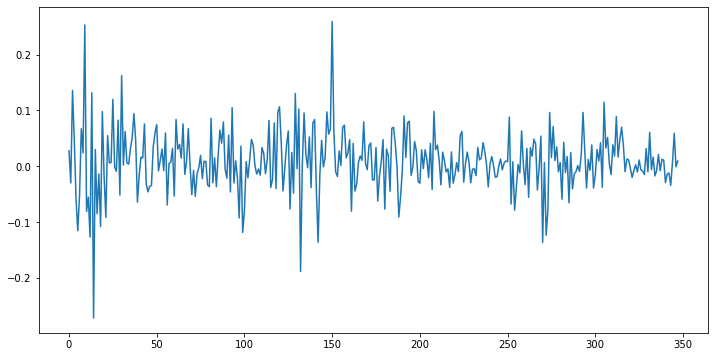

In [27]:
# Plot the graph
plt.figure(figsize=(12, 6))
df_clean_as['pct_change'].plot()
plt.show()

In [28]:
df_clean_as.loc[df_clean_as['pct_change'] < -0.1]

,date,open,high,low,close,volume,market_cap,RSI,delta,sell_points,...,bought_sold,open_class,high_class,low_class,close_class,volume_class,open_prev,high_prev,low_prev,volume_prev
5,2021-05-28,2742.47,2761.36,2336.36,2419.91,39999114805,280864129343,29.566867,-316.58,0,...,1,0,0,0,0,1,2888.75,2888.75,2642.61,33373635283
12,2021-05-21,2772.34,2938.21,2113.35,2430.62,53774070802,281879243639,36.798641,-353.67,0,...,0,1,0,0,0,0,2439.64,2993.15,2170.23,67610826680
14,2021-05-19,3382.66,3437.94,1952.46,2460.68,84482912776,285298709245,34.162889,-919.39,0,...,0,1,0,0,0,1,3276.87,3562.47,3246.40,40416525218
18,2021-05-15,4075.95,4129.19,3638.12,3638.12,42422321751,421619090683,61.884879,-440.94,0,...,0,1,0,0,0,0,3720.12,4171.02,3703.40,48174271215
99,2021-02-23,1781.41,1781.41,1378.84,1570.20,52029864713,180251030148,37.467376,-211.79,0,...,0,0,0,0,0,1,1935.56,1936.45,1580.63,42409646036
132,2021-01-21,1382.68,1382.68,1098.48,1121.57,45932464754,128249677791,44.771127,-260.70,0,...,0,1,0,0,0,0,1375.25,1405.74,1243.30,46784030909
142,2021-01-11,1261.62,1261.62,924.92,1090.15,60733630300,124508608482,72.853749,-172.10,0,...,2,0,0,0,0,1,1280.87,1347.93,1194.72,40616938053
270,2020-09-05,388.04,394.17,316.77,335.26,29880047640,37710860058,39.662822,-52.98,0,...,0,1,0,0,0,1,384.67,402.41,371.64,16747106257
272,2020-09-03,440.24,449.53,381.13,385.67,19622845896,43370721326,44.333125,-54.37,0,...,0,0,0,0,0,0,477.01,480.33,424.46,19691854014


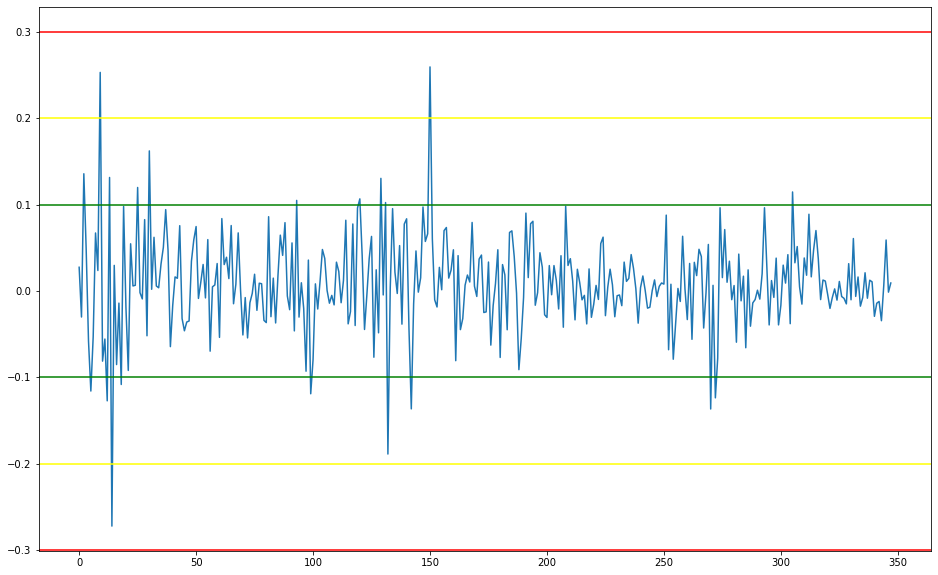

In [29]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
ax0 = df_clean_as['pct_change'].plot(ax=ax)
ax0.axhline(.10, color='green')
ax0.axhline(-.10, color='green')
ax0.axhline(.20, color='yellow')
ax0.axhline(-.20, color='yellow')
ax0.axhline(.30, color='red')
ax0.axhline(-.30, color='red')

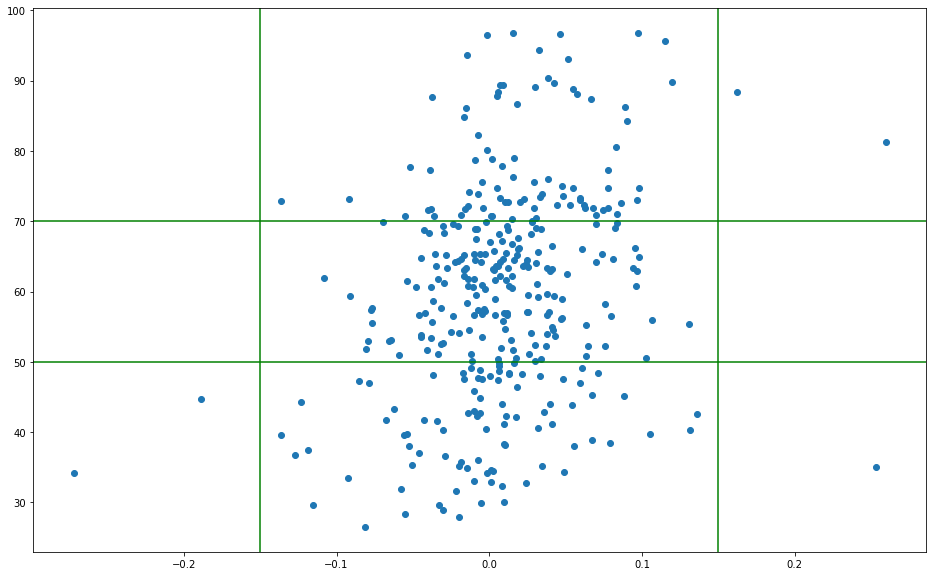

In [30]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
ax.scatter(df_clean_as['pct_change'], df_clean_as['RSI'])
ax.axhline(70, color='green')
ax.axhline(50, color='green')
ax.axvline(-.15, color='green')
ax.axvline(.15, color='green')

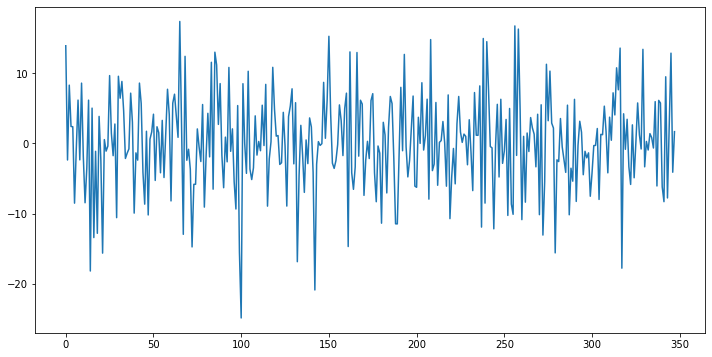

In [31]:
# plot RSI_Delta
plt.figure(figsize=(12, 6))
df_clean_as['RSI_Delta'].plot()
plt.show()

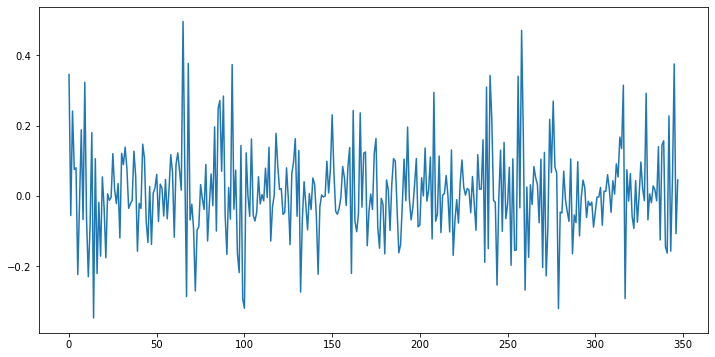

In [32]:
# plot RSI_Delta
plt.figure(figsize=(12, 6))
df_clean_as['RSI_pct_change'].plot()
plt.show()